Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from pycaret.classification import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Explained Variance Ratio: [0.39747021 0.30295205 0.16145572 0.07131525 0.05138315 0.01542362]


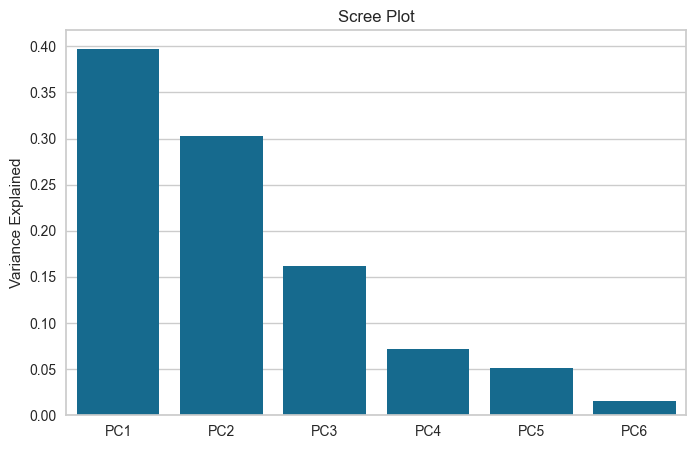

Cumulative Variance Explained: [0.39747021 0.70042226 0.86187798 0.93319323 0.98457638 1.        ]
Loadings:
          PC1       PC2       PC3       PC4       PC5       PC6
V1 -0.300180 -0.614344 -0.183474 -0.105313  0.277200  0.640999
V2  0.503715 -0.263534 -0.084629  0.695009  0.418370 -0.107646
V3 -0.363633 -0.570766 -0.194627  0.038606 -0.200211 -0.680105
V4  0.526215 -0.210514 -0.044580 -0.709880  0.344015 -0.233493
V5  0.158218  0.195328 -0.940028 -0.012959 -0.214732  0.082966
V6  0.471167 -0.380642  0.188827  0.016849 -0.737283  0.231489


In [2]:
# Load Toothpaste data
df = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv")

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_df)

# (1) How many factors (components)?
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

# Plot Scree Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_var_ratio))], y=explained_var_ratio)
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

# (2) Total percentage of variance explained by first N components (usually choose components with eigenvalue > 1 or cumulative variance > 70%)
cumulative_variance = explained_var_ratio.cumsum()
print("Cumulative Variance Explained:", cumulative_variance)

# (3) Check which variables load on which component
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(df.columns))],
                        index=df.columns)
print("Loadings:\n", loadings)


In [3]:
#Q2 and Q3 is below
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [5]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9354,0.9802,0.9081,0.9231,0.9154,0.8631,0.8634,1.5590
lightgbm,Light Gradient Boosting Machine,0.9320,0.9786,0.9069,0.9159,0.9113,0.8561,0.8563,0.3720
xgboost,Extreme Gradient Boosting,0.9318,0.9774,0.9081,0.9144,0.9111,0.8558,0.8560,0.2260
gbc,Gradient Boosting Classifier,0.9306,0.9780,0.9021,0.9169,0.9092,0.8530,0.8535,0.3710
rf,Random Forest Classifier,0.9297,0.9749,0.8937,0.9215,0.9072,0.8506,0.8511,0.2730
lr,Logistic Regression,0.9230,0.9738,0.8857,0.9123,0.8986,0.8366,0.8371,0.9510
ada,Ada Boost Classifier,0.9229,0.9727,0.8897,0.9086,0.8988,0.8365,0.8369,0.2800
et,Extra Trees Classifier,0.9210,0.9689,0.8773,0.9145,0.8953,0.8319,0.8326,0.3020
lda,Linear Discriminant Analysis,0.9207,0.9710,0.8721,0.9183,0.8943,0.8309,0.8319,0.2690
ridge,Ridge Classifier,0.9202,0.9714,0.8692,0.9196,0.8935,0.8298,0.8309,0.1670


Accuracy: 0.9386724386724387
Precision: 0.9227871939736346
Recall: 0.9176029962546817


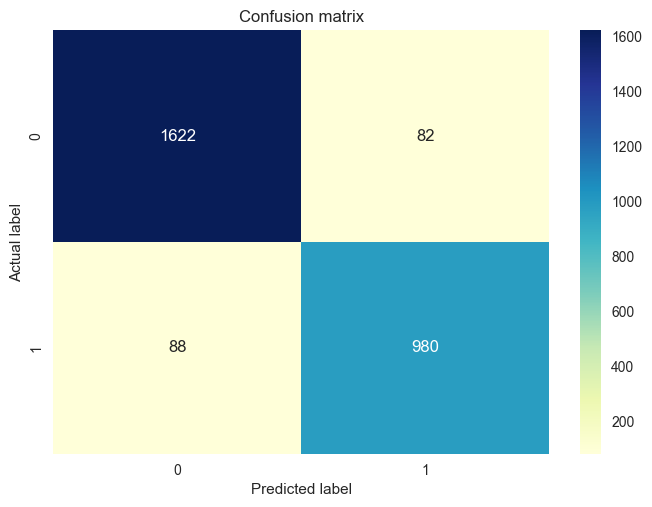

In [17]:
from pycaret.classification import *

# Prepare your dataset
data = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv")

# Fill missing values
for col in data.columns:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Drop unnecessary columns
data.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

# Setup PyCaret
s = setup(data=data, target='Converted', verbose=False, session_id=42)

# Split the data into train and test sets (This is important for evaluating the model correctly)
train_data = get_config('X_train')
test_data = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

# Compare and select best model
best_model = compare_models()

# Predict on the test set using the best model
predictions = predict_model(best_model, data=test_data)

# Eval function
def eval(yact, ypred):
    print("Accuracy:", metrics.accuracy_score(yact, ypred))
    print("Precision:", metrics.precision_score(yact, ypred))
    print("Recall:", metrics.recall_score(yact, ypred))
    cnf_matrix = metrics.confusion_matrix(yact, ypred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

# Evaluate on the test set
eval(y_test, predictions['prediction_label'])


In [14]:
pip install autogluon

  Using cached autogluon-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.core-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.features-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.tabular-1.2-py3-none-any.whl.metadata (14 kB)
  Using cached autogluon.multimodal-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.timeseries-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached boto3-1.38.4-py3-none-any.whl.metadata (6.6 kB)
  Using cached autogluon.common-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached ray-2.39.0-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached lightning-2.5.1.post0-py3-none-any.whl.metadata (39 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached accelerate-0.34.2-py3-none-any.whl.metadata (19 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached seqeval-1.2.2-py3

  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\Gulsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


No path specified. Models will be saved in: "AutogluonModels\ag-20250428_205503"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       1.96 GB / 15.65 GB (12.6%)
Disk Space Avail:   0.34 GB / 241.97 GB (0.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy.

Accuracy: 0.9292929292929293
Precision: 0.9112595419847328
Recall: 0.9026465028355387


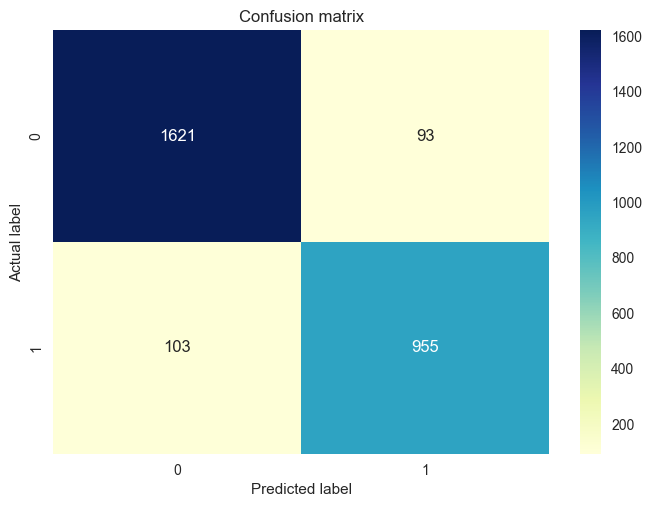

In [15]:
#Q3(30 pt)-Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

from autogluon.tabular import TabularPredictor

# Reload and preprocess
df = pd.read_csv("https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv")

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

# Split
X = df.drop(columns='Converted')
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_data = X_train.copy()
train_data['Converted'] = y_train

test_data = X_test.copy()
test_data['Converted'] = y_test

# Fit model
predictor = TabularPredictor(label='Converted').fit(train_data)

# Predict
preds = predictor.predict(test_data.drop(columns='Converted'))

# Evaluate
eval(test_data['Converted'], preds)
